## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [2]:
#!pip install pandas_datareader

In [3]:
from pandas_datareader import data as pdr 
import matplotlib.pyplot as plt 

In [4]:
%matplotlib inline

In [5]:
start = "2017-01-01" 
end = "2018-12-31" 
symbols = ["AAPL"] 
   
data = pdr.get_data_yahoo(symbols, start, end) 
   
data

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2017-01-03,27.174753,29.037500,29.082500,28.690001,28.950001,115127600.0
2017-01-04,27.144341,29.004999,29.127501,28.937500,28.962500,84472400.0
2017-01-05,27.282375,29.152500,29.215000,28.952499,28.980000,88774400.0
2017-01-06,27.586525,29.477501,29.540001,29.117500,29.195000,127007600.0
2017-01-09,27.839205,29.747499,29.857500,29.485001,29.487499,134247600.0
...,...,...,...,...,...,...
2018-12-24,35.429188,36.707500,37.887501,36.647499,37.037498,148676800.0
2018-12-26,37.924168,39.292500,39.307499,36.680000,37.075001,234330000.0


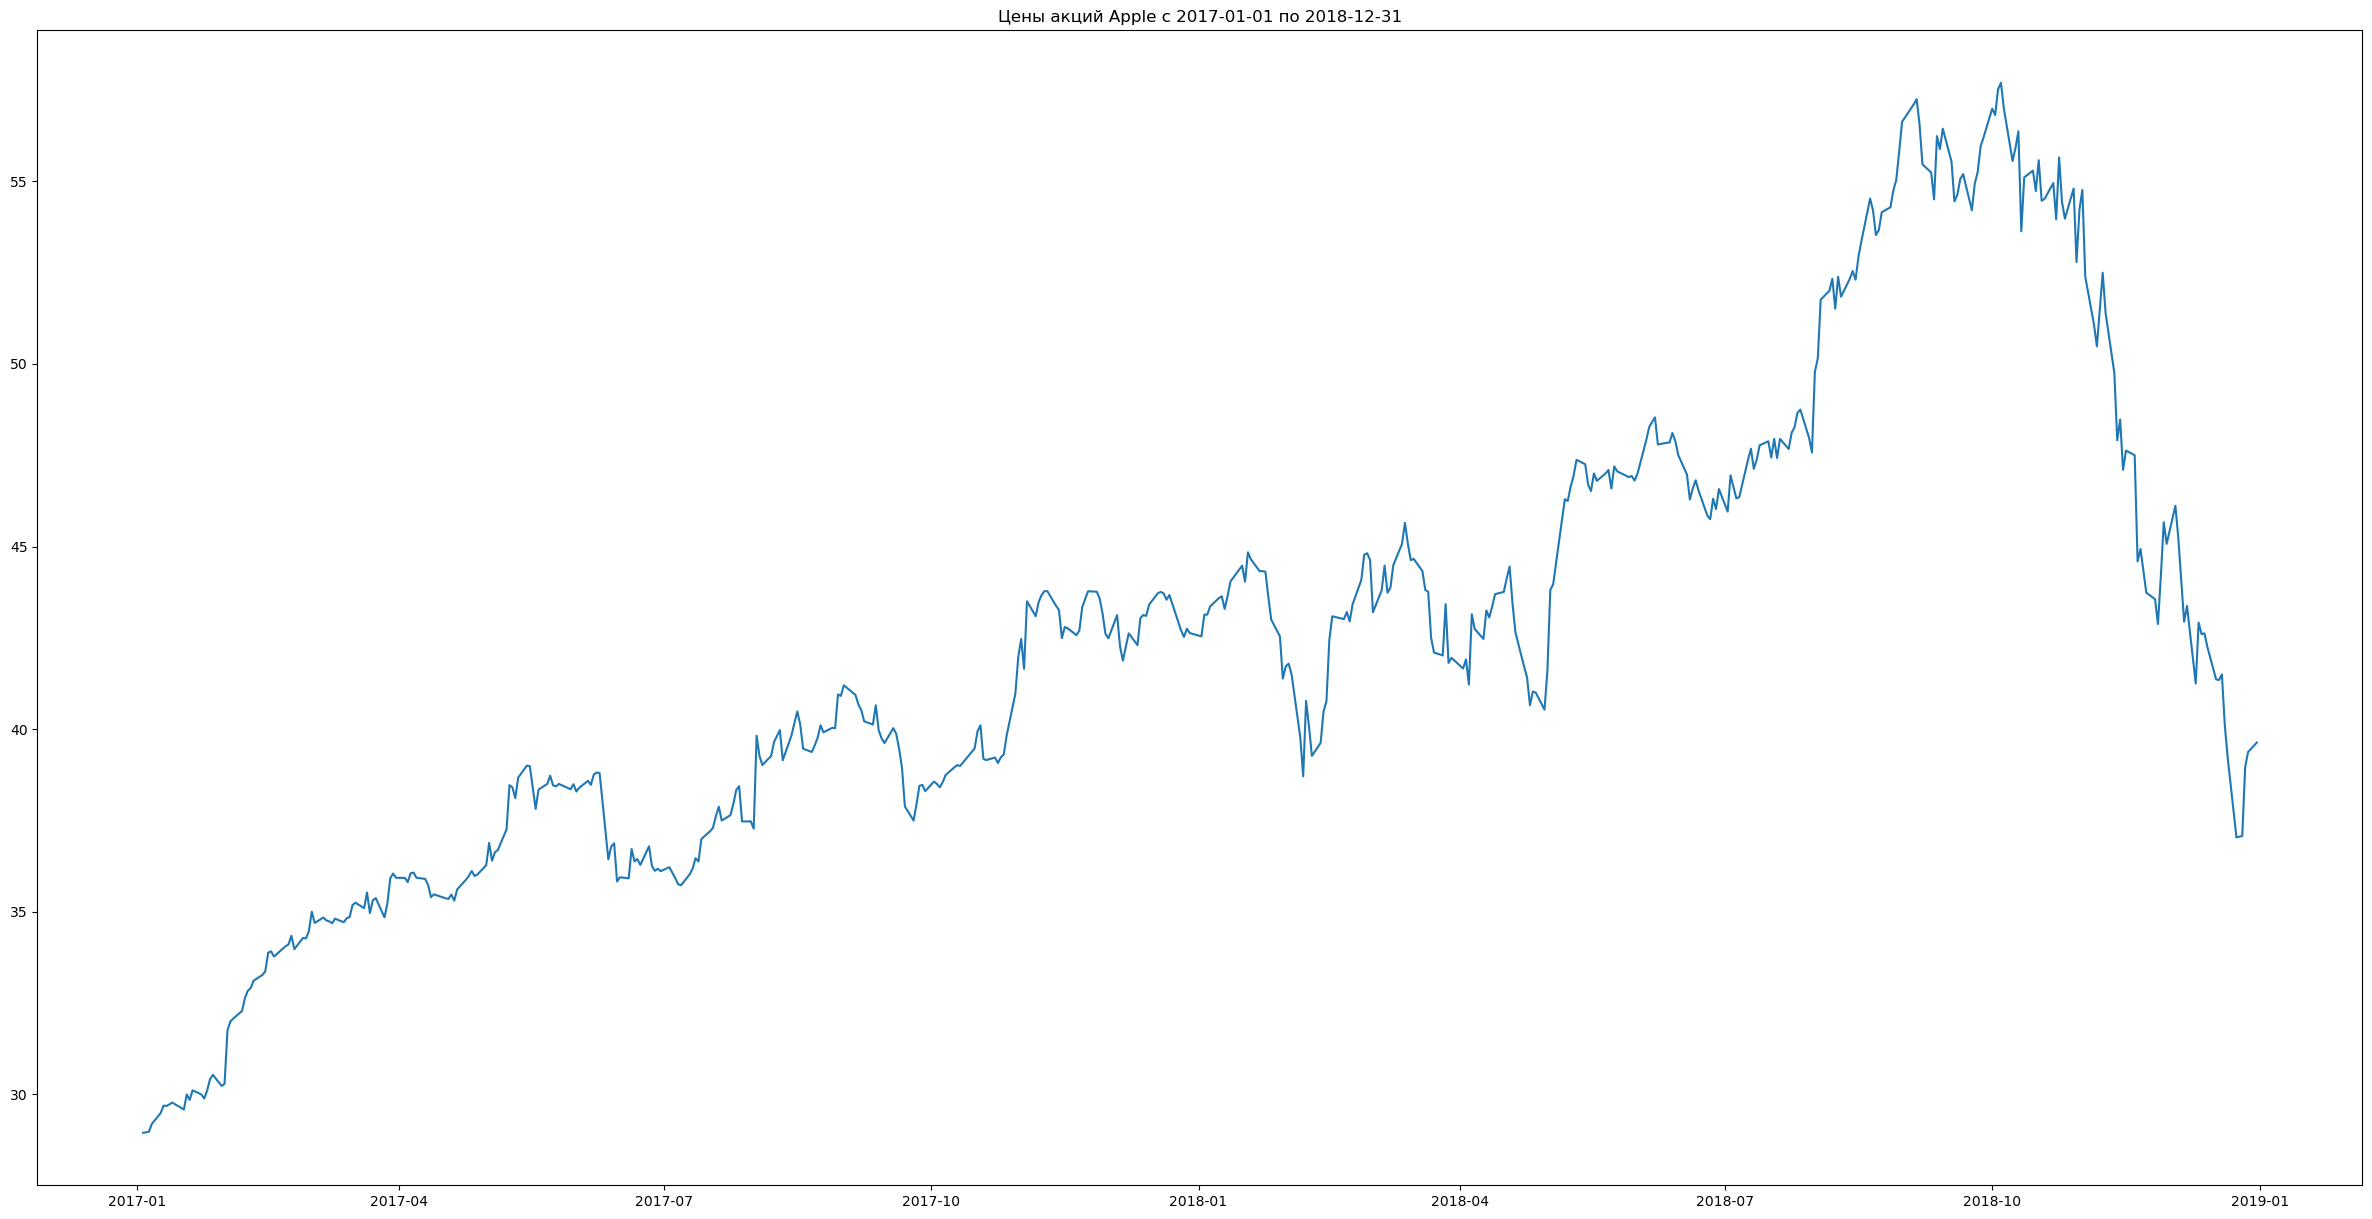

In [6]:
plt.figure(figsize = (30, 15)) 
plt.title(f'Цены акций Apple с {start} по {end}') 
plt.plot(data['Open']) 
plt.show()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [7]:
avg_ratings = np.load('average_ratings.npy')

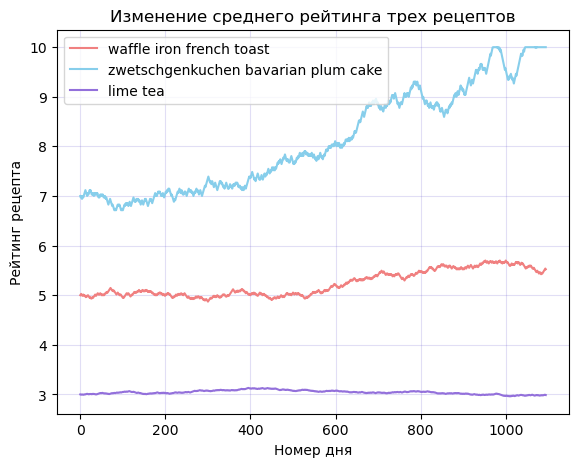

In [8]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
x = [i for i in range(1095)]
line1, = ax.plot(x, avg_ratings[0], 'lightcoral', label = 'waffle iron french toast')
line2, = ax.plot(x, avg_ratings[1], 'skyblue', label = 'zwetschgenkuchen bavarian plum cake')
line3, = ax.plot(x, avg_ratings[2], 'mediumpurple', label = 'lime tea')

ax.set_title("Изменение среднего рейтинга трех рецептов")
ax.legend(handles=[line1, line2, line3], loc = 'upper left')
ax.set_xlabel("Номер дня")
ax.set_ylabel("Рейтинг рецепта")
ax.grid(color='slateblue', alpha=0.2)

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


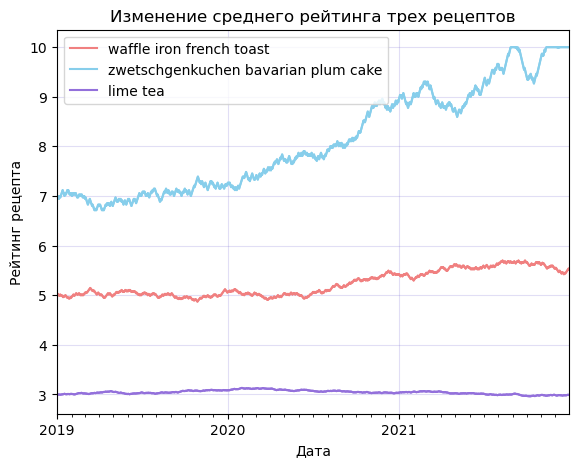

In [10]:
dates = pd.date_range(start='1/1/2019', end='30/12/2021')
line1, = ax.plot(dates, avg_ratings[0], 'lightcoral', label = 'waffle iron french toast')
line2, = ax.plot(dates, avg_ratings[1], 'skyblue', label = 'zwetschgenkuchen bavarian plum cake')
line3, = ax.plot(dates, avg_ratings[2], 'mediumpurple', label = 'lime tea')
ax.set_xlabel("Дата")
ax.set_xlim([dates[0], dates[-1]])
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
fig

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

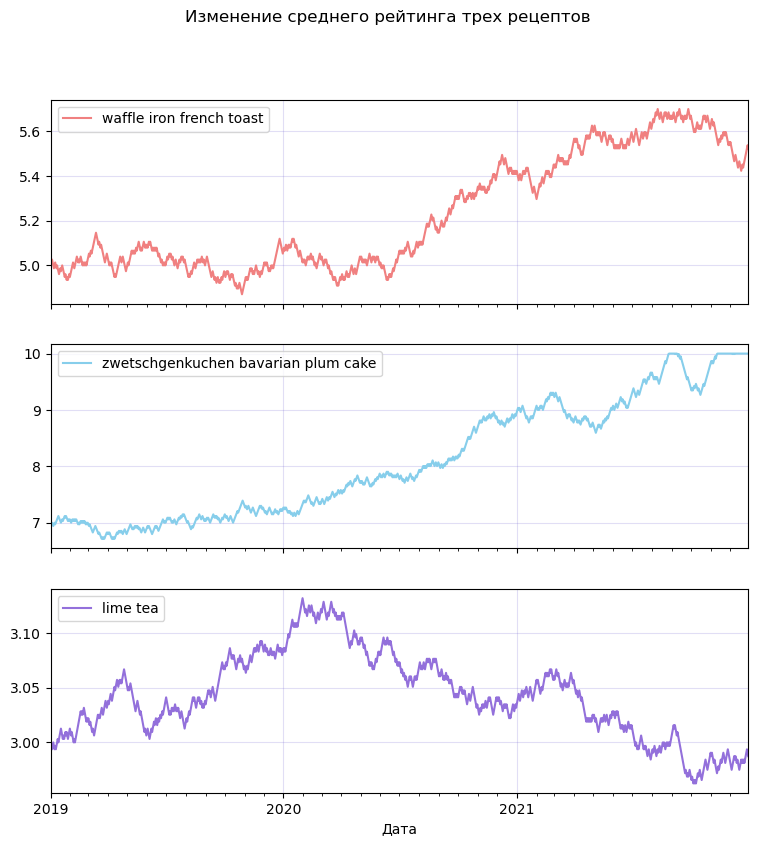

In [11]:
fig2, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize = (9, 9), sharex='col')
fig2.suptitle("Изменение среднего рейтинга трех рецептов")

ax1.plot(dates, avg_ratings[0], 'lightcoral', label = 'waffle iron french toast')
ax1.set_xlim([dates[0], dates[-1]])
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.grid(color='slateblue', alpha=0.2)
#ax1.set_yticks(np.arange(0,11))
ax1.legend()

ax2.plot(dates, avg_ratings[1], 'skyblue', label = 'zwetschgenkuchen bavarian plum cake')
ax2.set_xlim([dates[0], dates[-1]])
ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_minor_locator(mdates.MonthLocator())
ax2.grid(color='slateblue', alpha=0.2)
#ax2.set_yticks(np.arange(0,11))
ax2.legend()

ax3.plot(dates, avg_ratings[2], 'mediumpurple', label = 'lime tea')
ax3.set_xlabel("Дата")
ax3.set_xlim([dates[0], dates[-1]])
ax3.xaxis.set_major_locator(mdates.YearLocator())
ax3.xaxis.set_minor_locator(mdates.MonthLocator())
#ax3.set_yticks(np.arange(0,11))
ax3.legend(loc='upper left')
ax3.grid(color='slateblue', alpha=0.2)


4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


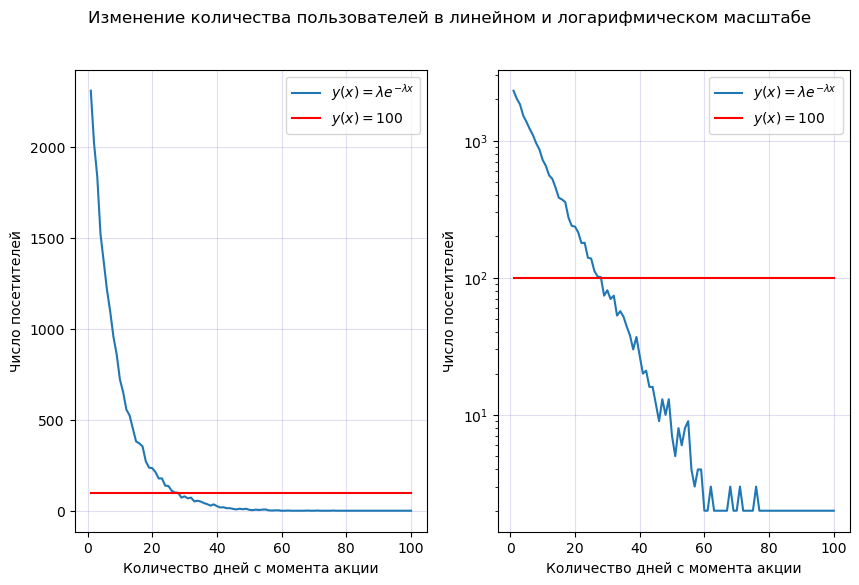

In [12]:
visitors = np.load('visitors.npy')
fig3, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
fig3.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

ax1.plot(np.arange(1,101), visitors, label='$y(x)=\lambda e^{-\lambda x}$')
ax1.set_xlabel("Количество дней с момента акции")
ax1.set_ylabel("Число посетителей")
ax1.plot(np.arange(1,101), [100]*100, 'r', label='$y(x)=100$')
ax1.legend()
ax1.grid(color='slateblue', alpha=0.2)

ax2.plot(np.arange(1,101), visitors, label='$y(x)=\lambda e^{-\lambda x}$')
ax2.set_yscale('log')
ax2.set_xlabel("Количество дней с момента акции")
ax2.set_ylabel("Число посетителей")
ax2.plot(np.arange(1,101), [100]*100, 'r', label='$y(x)=100$')
ax2.legend()
ax2.grid(color='slateblue', alpha=0.2)

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [3]:
recipes = pd.read_csv('recipes_sample.csv', delimiter = ',')
reviews = pd.read_csv('reviews_sample.csv', delimiter = ',')

In [16]:
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [47]:
#получение данных
short = recipes[recipes.minutes < 5]
medium = recipes[(recipes.minutes < 50) & (recipes.minutes >= 5)]
long = recipes[recipes.minutes >= 50]
recipes_groups = [short, medium, long]
lengths = [] #длины трех полученных отсортированных списков
steps = [] #среднее количество шагов трех полученных отсортированных списков
for group in recipes_groups:
    lengths.append(len(group))
    steps.append(group.n_steps.mean())
lengths, steps

([675, 17607, 11718],
 [4.990430622009569, 8.581921927361652, 11.917290164603456])

In [112]:
#Объединяем полученные данные в один датафрейм
data = pd.DataFrame(data = [[lengths[0], steps[0]], [lengths[1], steps[1]], [lengths[2], steps[2]]], index=['short', 'medium', 'long'], columns=['length', 'average steps'])
data

,length,average steps
short,675,4.990431
medium,17607,8.581922
long,11718,11.917290


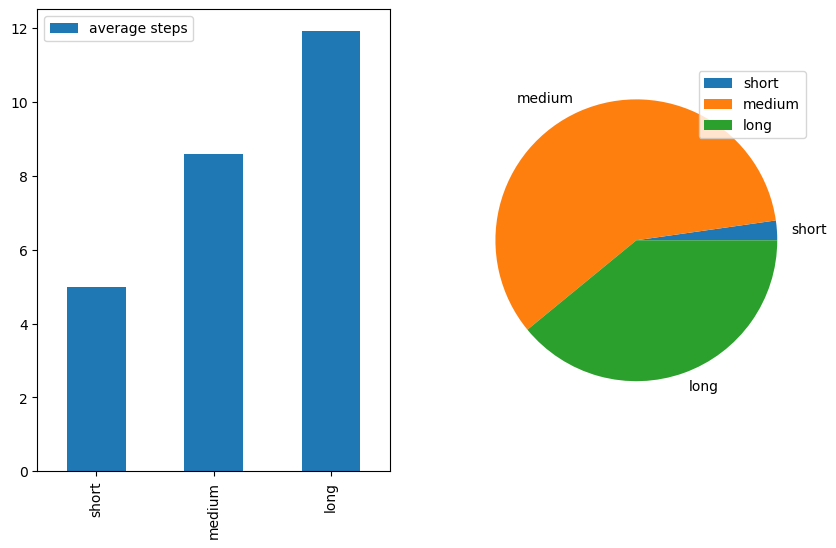

In [115]:
#визуализация
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (10,6))
data.plot(ax=ax1, y='average steps', xlabel = '', kind = 'bar');
data.plot(ax=ax2, y='length', ylabel = '', kind = 'pie');

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

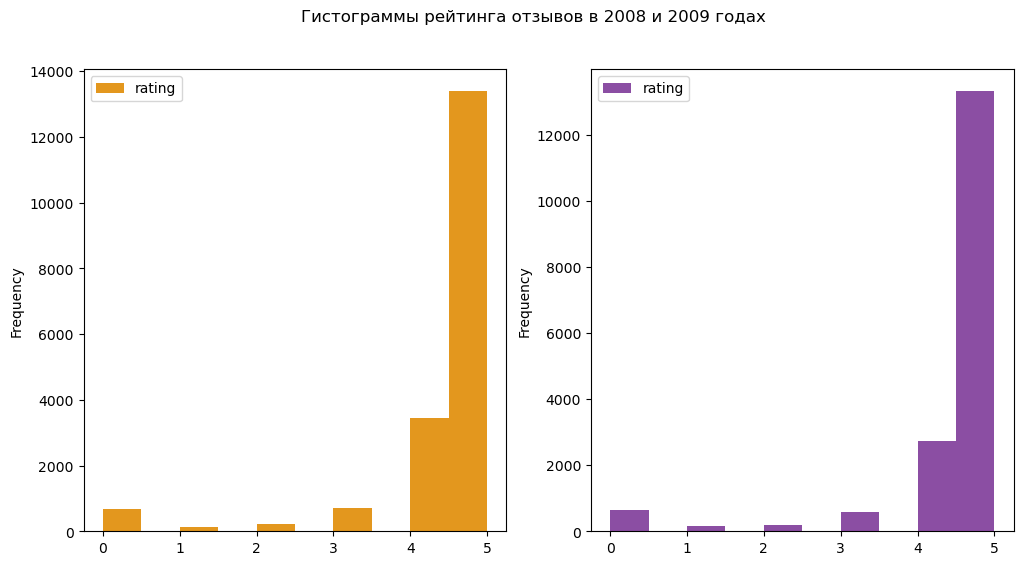

In [149]:
reviews_2008 = reviews[reviews.date.str[:4]=='2008']
reviews_2009 = reviews[reviews.date.str[:4]=='2009']
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Гистограммы рейтинга отзывов в 2008 и 2009 годах")
reviews_2008.rating.plot.hist(color='#e3971e', ax=ax1);
reviews_2009.rating.plot.hist(color='#8b4ea3', ax=ax2);
ax1.legend();
ax2.legend();

### Визуализация данных при помощи пакета `seaborn`

In [150]:
import seaborn as sns

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

In [188]:
#Для удобства добавим в исходный датафрейм столбец, описывающий длительность рецепта (короткий, средний или длинный)
def duration_status(minutes):
    if minutes < 5:
        return "short"
    elif 5 <= minutes < 50:
        return "medium"
    else:
        return "long"

In [189]:
recipes['duration'] = recipes['minutes'].map(duration_status)
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,duration
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,long
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,medium
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,medium
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,medium
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,medium
...,...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0,long
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0,long
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN,long
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,long


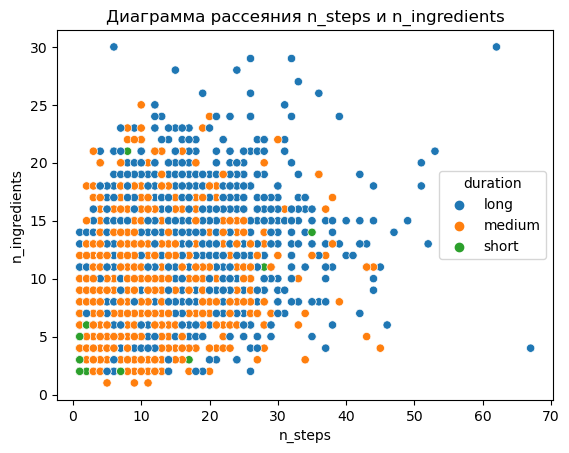

In [214]:
sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='duration').set(title='Диаграмма рассеяния n_steps и n_ingredients');

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [4]:
all_data = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')
all_data

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,Unnamed: 0,user_id,recipe_id,date,rating,review
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,920960,743566,44123,2008-01-28,5,I lived in San Diego for 19 years and would g...
1,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,920958,76503,44123,2003-06-03,5,This soup is the Bomb! Don't hesitate to try.....
2,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,920957,34206,44123,2003-03-23,5,I just can't say enough about how wonderful th...
3,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,897580,494084,67664,2012-09-26,5,These are great! I use 100% (organic) juice a...
4,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,897579,303445,67664,2012-03-31,5,"Very, very good. My son loves these. He like..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126691,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,493812,305531,486161,2013-07-18,5,Delish! I made this as directed but used a smo...
126692,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,493330,1271506,486161,2012-09-10,5,Now the only substitution I made was African B...
126693,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,493813,724631,486161,2014-01-07,5,"Very tasty soup, moderate spiciness (even afte..."
126694,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,493811,133174,486161,2013-07-18,5,Very yummy indeed. A spicy sausage was used i...


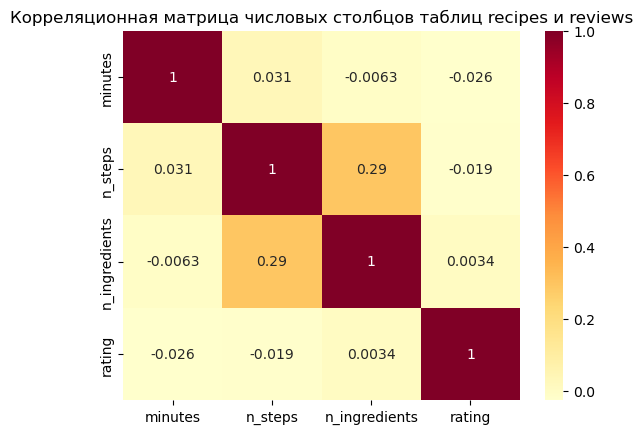

In [6]:
corr_matrix = all_data[['minutes', 'n_steps', 'n_ingredients', 'rating']].corr()
sns.heatmap(data=corr_matrix, cmap='YlOrRd', annot=True).set(title='Корреляционная матрица числовых столбцов таблиц recipes и reviews');